<a href="https://colab.research.google.com/github/dhiyaul10/PCVK_Ganjil_2025/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Dhiya' Ulhaq Ulayya

NIM   : 2341720021

Kelas : TI - 3A

Modul : 6 - Histogram, Histogram Equalization, Dithering

# **Praktikum**

**2. Import beberapa library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# Set style untuk plot
plt.style.use('ggplot')

**3. Buatlah histogram citra**

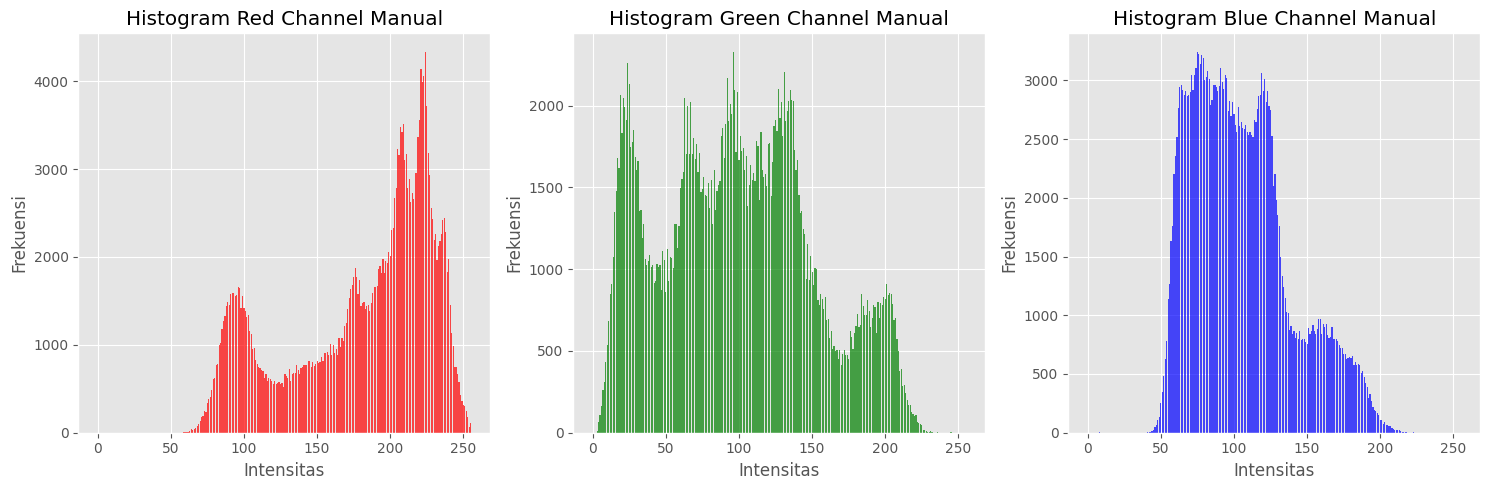

In [3]:
def manual_histogram(image):
    """Membuat histogram citra secara manual"""
    if len(image.shape) == 3:  # Gambar berwarna
        height, width, channels = image.shape
        # Inisialisasi histogram untuk setiap channel
        hist_r = [0] * 256
        hist_g = [0] * 256
        hist_b = [0] * 256

        # Hitung frekuensi setiap intensitas
        for i in range(height):
            for j in range(width):
                b, g, r = image[i, j]
                hist_b[b] += 1
                hist_g[g] += 1
                hist_r[r] += 1

        return hist_r, hist_g, hist_b
    else:  # Gambar grayscale
        height, width = image.shape
        hist_gray = [0] * 256

        for i in range(height):
            for j in range(width):
                gray_val = image[i, j]
                hist_gray[gray_val] += 1

        return hist_gray

# Load gambar lena.png
lena_path = '/content/drive/MyDrive/Image PCVK/Lenna_(test_image).png'  # Sesuaikan path
lena = cv.imread(lena_path)
lena_rgb = cv.cvtColor(lena, cv.COLOR_BGR2RGB)

# Buat histogram manual
hist_r, hist_g, hist_b = manual_histogram(lena)

# Plot histogram manual
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_r, color='red', alpha=0.7)
plt.title('Histogram Red Channel Manual')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g, color='green', alpha=0.7)
plt.title('Histogram Green Channel Manual')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_b, color='blue', alpha=0.7)
plt.title('Histogram Blue Channel Manual')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy**

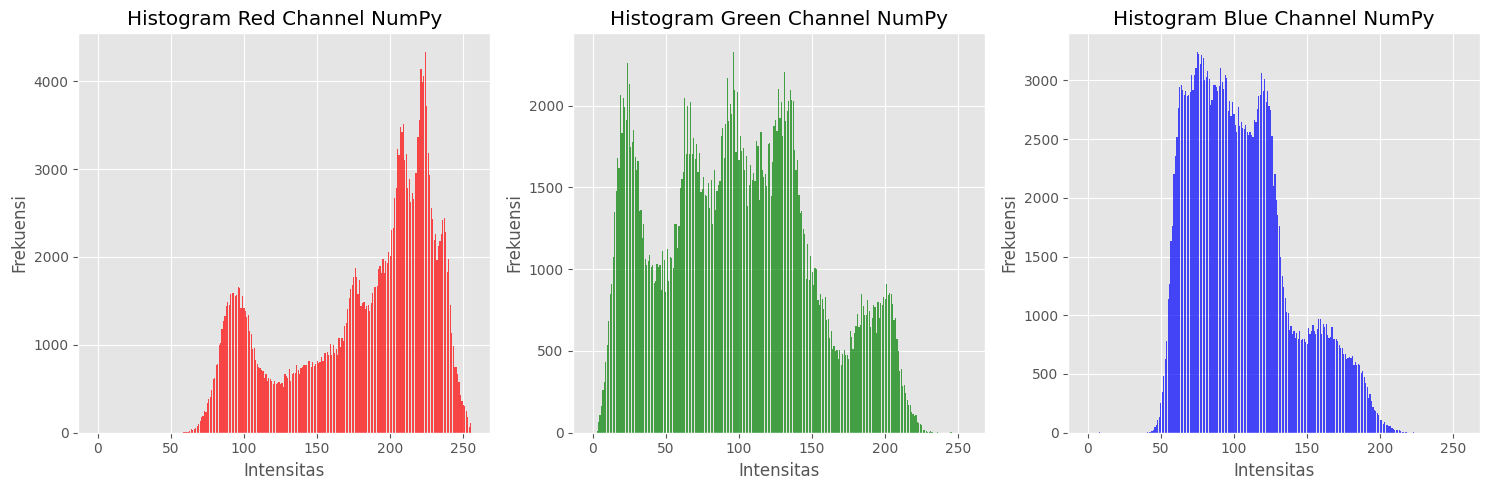

Perbandingan Histogram Manual vs NumPy:
Red Channel - MSE: 0.0
Green Channel - MSE: 0.0
Blue Channel - MSE: 0.0


In [4]:
def numpy_histogram(image):
    """Membuat histogram menggunakan NumPy"""
    if len(image.shape) == 3:  # Gambar berwarna
        hist_r = np.histogram(image[:,:,0], bins=256, range=[0,256])[0]
        hist_g = np.histogram(image[:,:,1], bins=256, range=[0,256])[0]
        hist_b = np.histogram(image[:,:,2], bins=256, range=[0,256])[0]
        return hist_r, hist_g, hist_b
    else:  # Gambar grayscale
        hist_gray = np.histogram(image, bins=256, range=[0,256])[0]
        return hist_gray

# Buat histogram dengan NumPy
hist_r_np, hist_g_np, hist_b_np = numpy_histogram(lena_rgb)

# Plot histogram NumPy
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_r_np, color='red', alpha=0.7)
plt.title('Histogram Red Channel NumPy')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g_np, color='green', alpha=0.7)
plt.title('Histogram Green Channel NumPy')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_b_np, color='blue', alpha=0.7)
plt.title('Histogram Blue Channel NumPy')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Bandingkan hasil manual vs NumPy
print("Perbandingan Histogram Manual vs NumPy:")
print(f"Red Channel - MSE: {np.mean((np.array(hist_r) - hist_r_np)**2)}")
print(f"Green Channel - MSE: {np.mean((np.array(hist_g) - hist_g_np)**2)}")
print(f"Blue Channel - MSE: {np.mean((np.array(hist_b) - hist_b_np)**2)}")

**5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization**

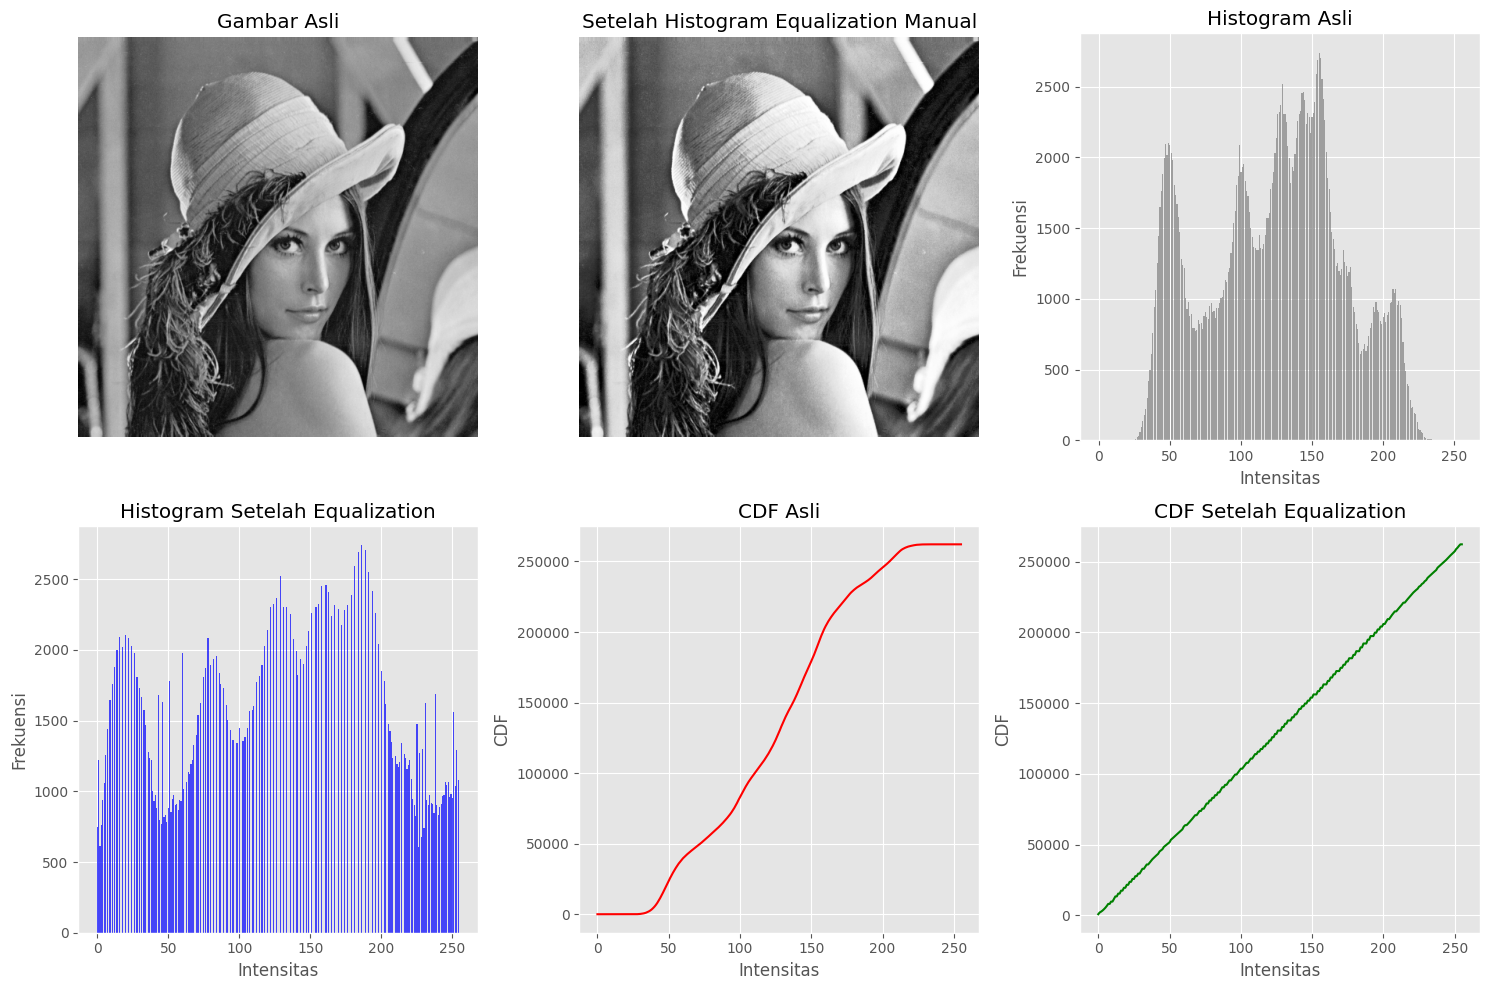

In [5]:
def manual_histogram_equalization(image):
    """Implementasi histogram equalization manual"""
    if len(image.shape) == 3:  # Convert to grayscale first
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    height, width = image.shape
    total_pixels = height * width

    # Hitung histogram
    hist = np.zeros(256)
    for i in range(height):
        for j in range(width):
            hist[image[i, j]] += 1

    # Hitung cumulative distribution function (CDF)
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist[i]

    # Normalisasi CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (total_pixels - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Apply mapping
    equalized_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            equalized_image[i, j] = cdf_normalized[image[i, j]]

    return equalized_image, hist

# Load gambar lena_lc.jpg
lena_lc_path = '/content/drive/MyDrive/Image PCVK/Lenna_(test_image).png'  # Sesuaikan path
lena_lc = cv.imread(lena_lc_path)
lena_lc_gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)

# Apply histogram equalization manual
equalized_manual, hist_original = manual_histogram_equalization(lena_lc)

# Hitung histogram setelah equalization
hist_equalized = np.histogram(equalized_manual, bins=256, range=[0,256])[0]

# Plot hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(lena_lc_gray, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(equalized_manual, cmap='gray')
plt.title('Setelah Histogram Equalization Manual')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.bar(range(256), hist_original, color='gray', alpha=0.7)
plt.title('Histogram Asli')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 4)
plt.bar(range(256), hist_equalized, color='blue', alpha=0.7)
plt.title('Histogram Setelah Equalization')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

# Plot CDF
cdf_original = np.cumsum(hist_original)
cdf_equalized = np.cumsum(hist_equalized)

plt.subplot(2, 3, 5)
plt.plot(cdf_original, color='red')
plt.title('CDF Asli')
plt.xlabel('Intensitas')
plt.ylabel('CDF')

plt.subplot(2, 3, 6)
plt.plot(cdf_equalized, color='green')
plt.title('CDF Setelah Equalization')
plt.xlabel('Intensitas')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()

**6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2**

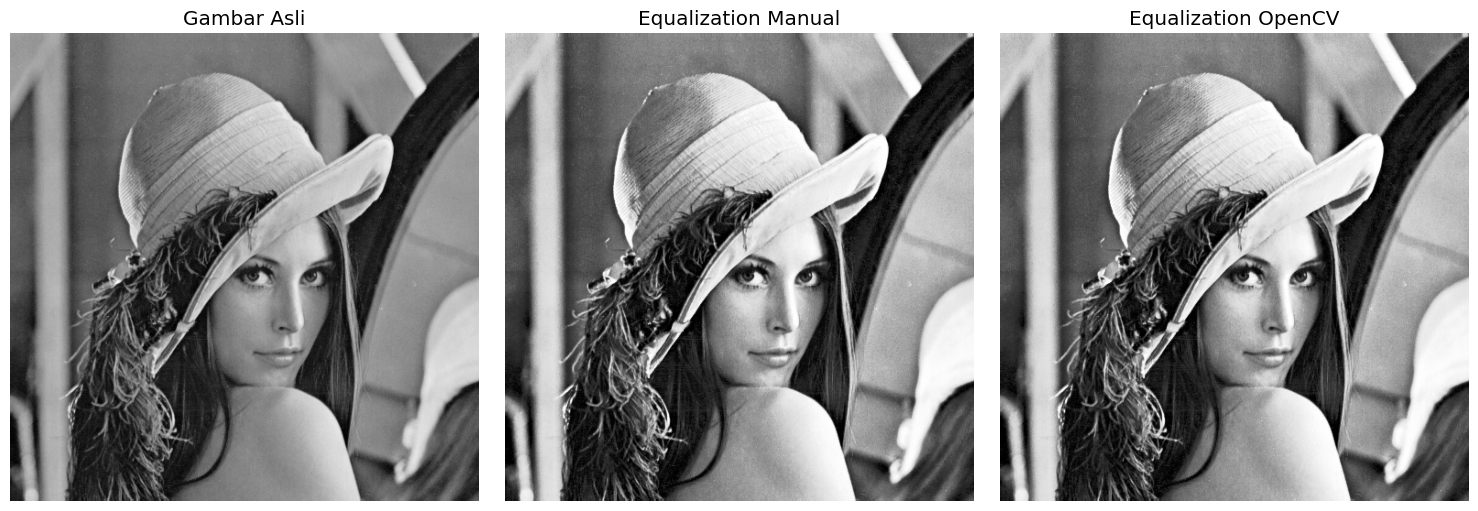

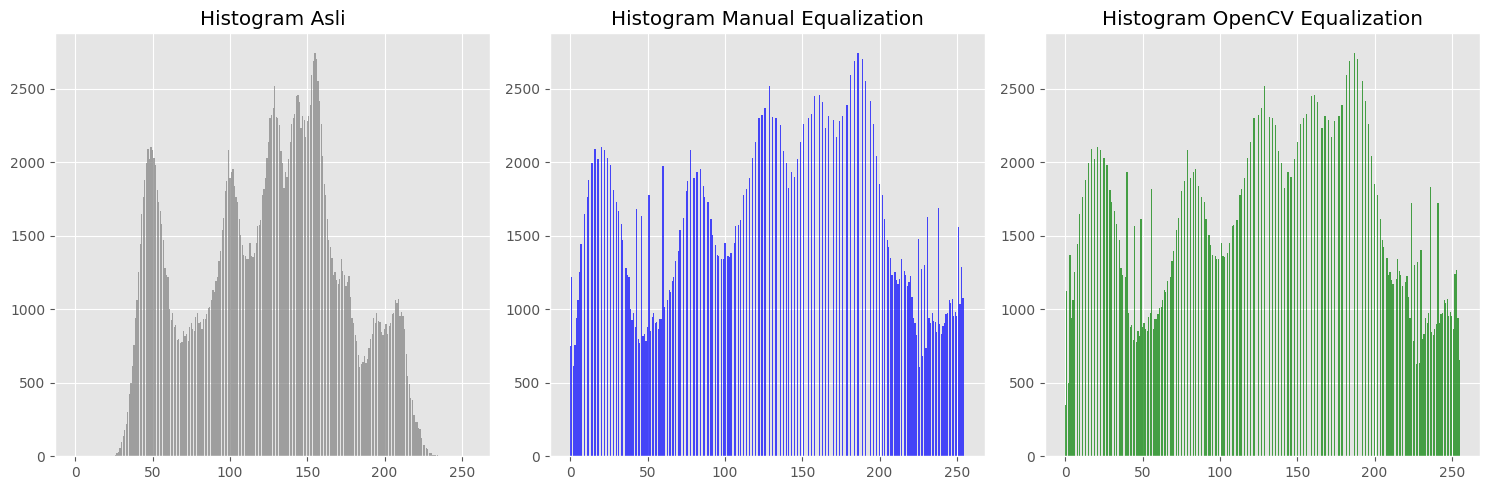

Perbandingan Manual vs OpenCV Equalization:
MSE: 0.4775428771972656


In [6]:
def cv2_histogram_equalization(image):
    """Histogram equalization menggunakan OpenCV"""
    if len(image.shape) == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    equalized = cv.equalizeHist(image)
    return equalized

# Apply histogram equalization dengan OpenCV
equalized_cv2 = cv2_histogram_equalization(lena_lc)

# Hitung histogram
hist_cv2 = np.histogram(equalized_cv2, bins=256, range=[0,256])[0]

# Plot perbandingan
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(lena_lc_gray, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_manual, cmap='gray')
plt.title('Equalization Manual')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalized_cv2, cmap='gray')
plt.title('Equalization OpenCV')
plt.axis('off')

plt.tight_layout()
plt.show()

# Bandingkan histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_original, color='gray', alpha=0.7)
plt.title('Histogram Asli')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_equalized, color='blue', alpha=0.7)
plt.title('Histogram Manual Equalization')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_cv2, color='green', alpha=0.7)
plt.title('Histogram OpenCV Equalization')

plt.tight_layout()
plt.show()

print("Perbandingan Manual vs OpenCV Equalization:")
print(f"MSE: {np.mean((equalized_manual - equalized_cv2)**2)}")

**7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih**

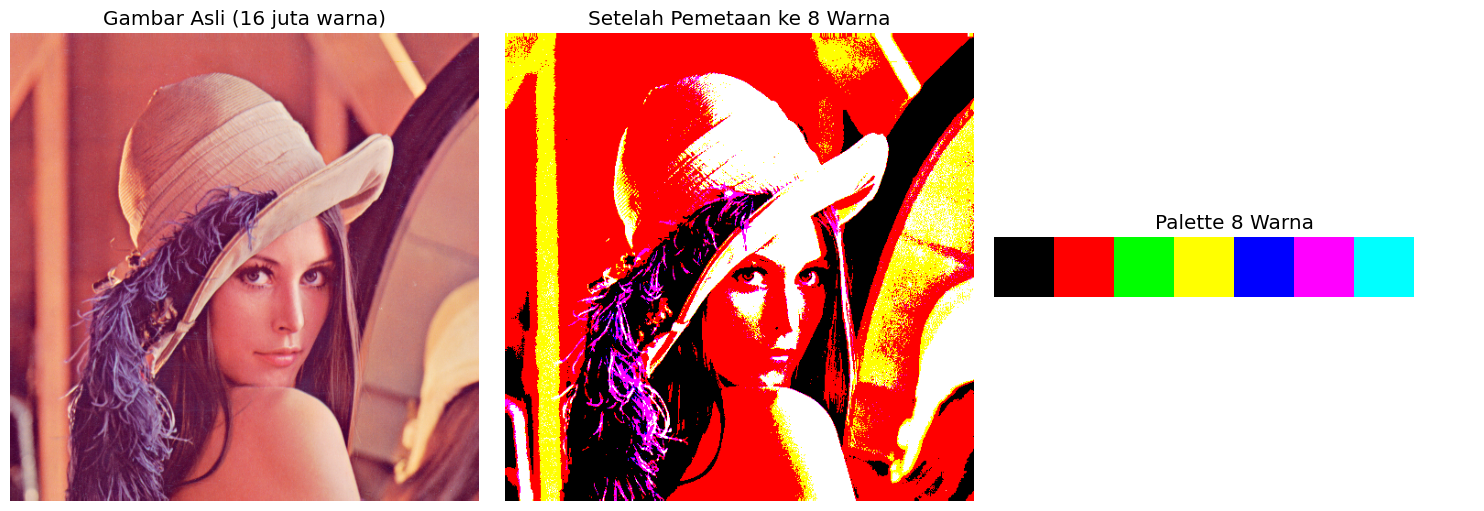

In [7]:
def map_to_8_colors(image):
    """Memetakan 16 juta warna RGB ke 8 warna dasar"""
    # 8 warna dasar: hitam, merah, hijau, kuning, biru, magenta, cyan, putih
    colors_8bit = [
        [0, 0, 0],       # Hitam
        [255, 0, 0],     # Merah
        [0, 255, 0],     # Hijau
        [255, 255, 0],   # Kuning
        [0, 0, 255],     # Biru
        [255, 0, 255],   # Magenta
        [0, 255, 255],   # Cyan
        [255, 255, 255]  # Putih
    ]

    height, width, channels = image.shape
    result = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            # Konversi ke binary (0 atau 255) berdasarkan threshold 128
            binary_pixel = (pixel > 128) * 255
            # Temukan warna terdekat dalam palette 8 warna
            min_dist = float('inf')
            best_color = [0, 0, 0]

            for color in colors_8bit:
                dist = np.sqrt(np.sum((binary_pixel - color)**2))
                if dist < min_dist:
                    min_dist = dist
                    best_color = color

            result[i, j] = best_color

    return result

# Apply pemetaan ke 8 warna
lena_8colors = map_to_8_colors(lena_rgb)

# Plot hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(lena_rgb)
plt.title('Gambar Asli (16 juta warna)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lena_8colors)
plt.title('Setelah Pemetaan ke 8 Warna')
plt.axis('off')

# Tampilkan palette 8 warna
palette = np.array([
    [0, 0, 0],       # Hitam
    [255, 0, 0],     # Merah
    [0, 255, 0],     # Hijau
    [255, 255, 0],   # Kuning
    [0, 0, 255],     # Biru
    [255, 0, 255],   # Magenta
    [0, 255, 255],   # Cyan
    [255, 255, 255]  # Putih
], dtype=np.uint8)

plt.subplot(1, 3, 3)
plt.imshow([palette])
plt.title('Palette 8 Warna')
plt.axis('off')

plt.tight_layout()
plt.show()

**8. Lakukanlah proses dithering Floyd and Steinberg**

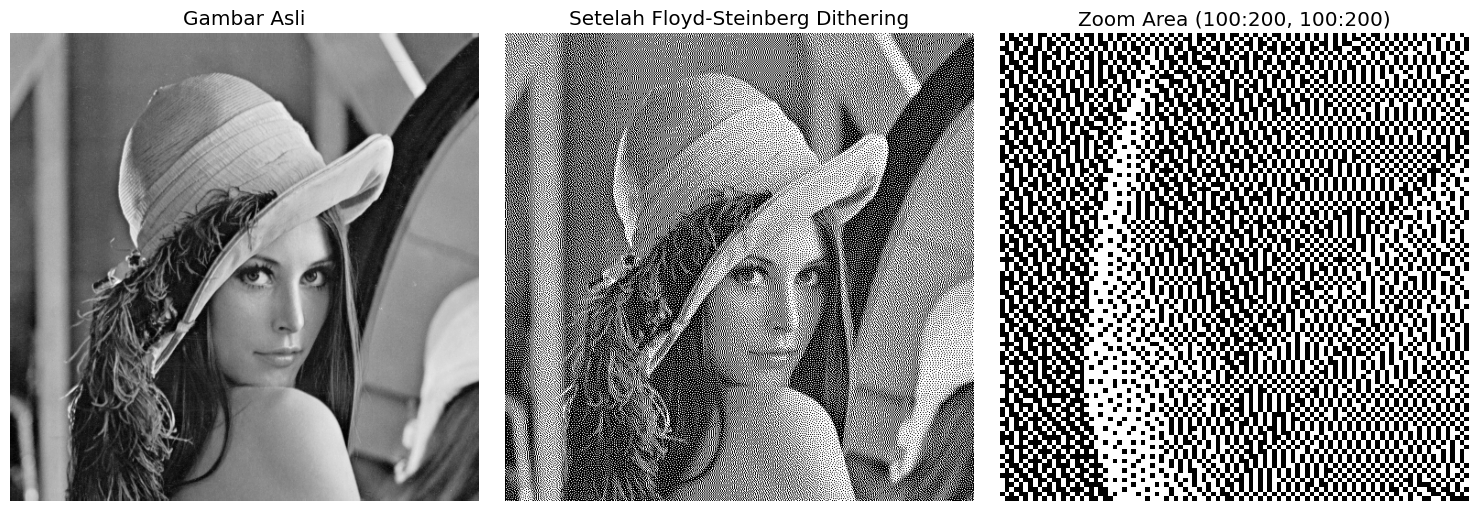

In [8]:
def floyd_steinberg_dithering(image):
    """Implementasi Floyd-Steinberg dithering"""
    if len(image.shape) == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    img = image.copy().astype(float)
    height, width = img.shape

    for y in range(height):
        for x in range(width):
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            img[y, x] = new_pixel

            error = old_pixel - new_pixel

            # Sebarkan error ke pixel tetangga
            if x + 1 < width:
                img[y, x + 1] += error * 7/16
            if y + 1 < height:
                if x - 1 >= 0:
                    img[y + 1, x - 1] += error * 3/16
                img[y + 1, x] += error * 5/16
                if x + 1 < width:
                    img[y + 1, x + 1] += error * 1/16

    # Clip values to [0, 255] and convert to uint8
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Apply Floyd-Steinberg dithering
lena_dithered = floyd_steinberg_dithering(lena)

# Plot hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(lena_lc_gray, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lena_dithered, cmap='gray')
plt.title('Setelah Floyd-Steinberg Dithering')
plt.axis('off')

# Zoom untuk melihat detail
plt.subplot(1, 3, 3)
plt.imshow(lena_dithered[100:200, 100:200], cmap='gray')
plt.title('Zoom Area (100:200, 100:200)')
plt.axis('off')

plt.tight_layout()
plt.show()

**9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg**

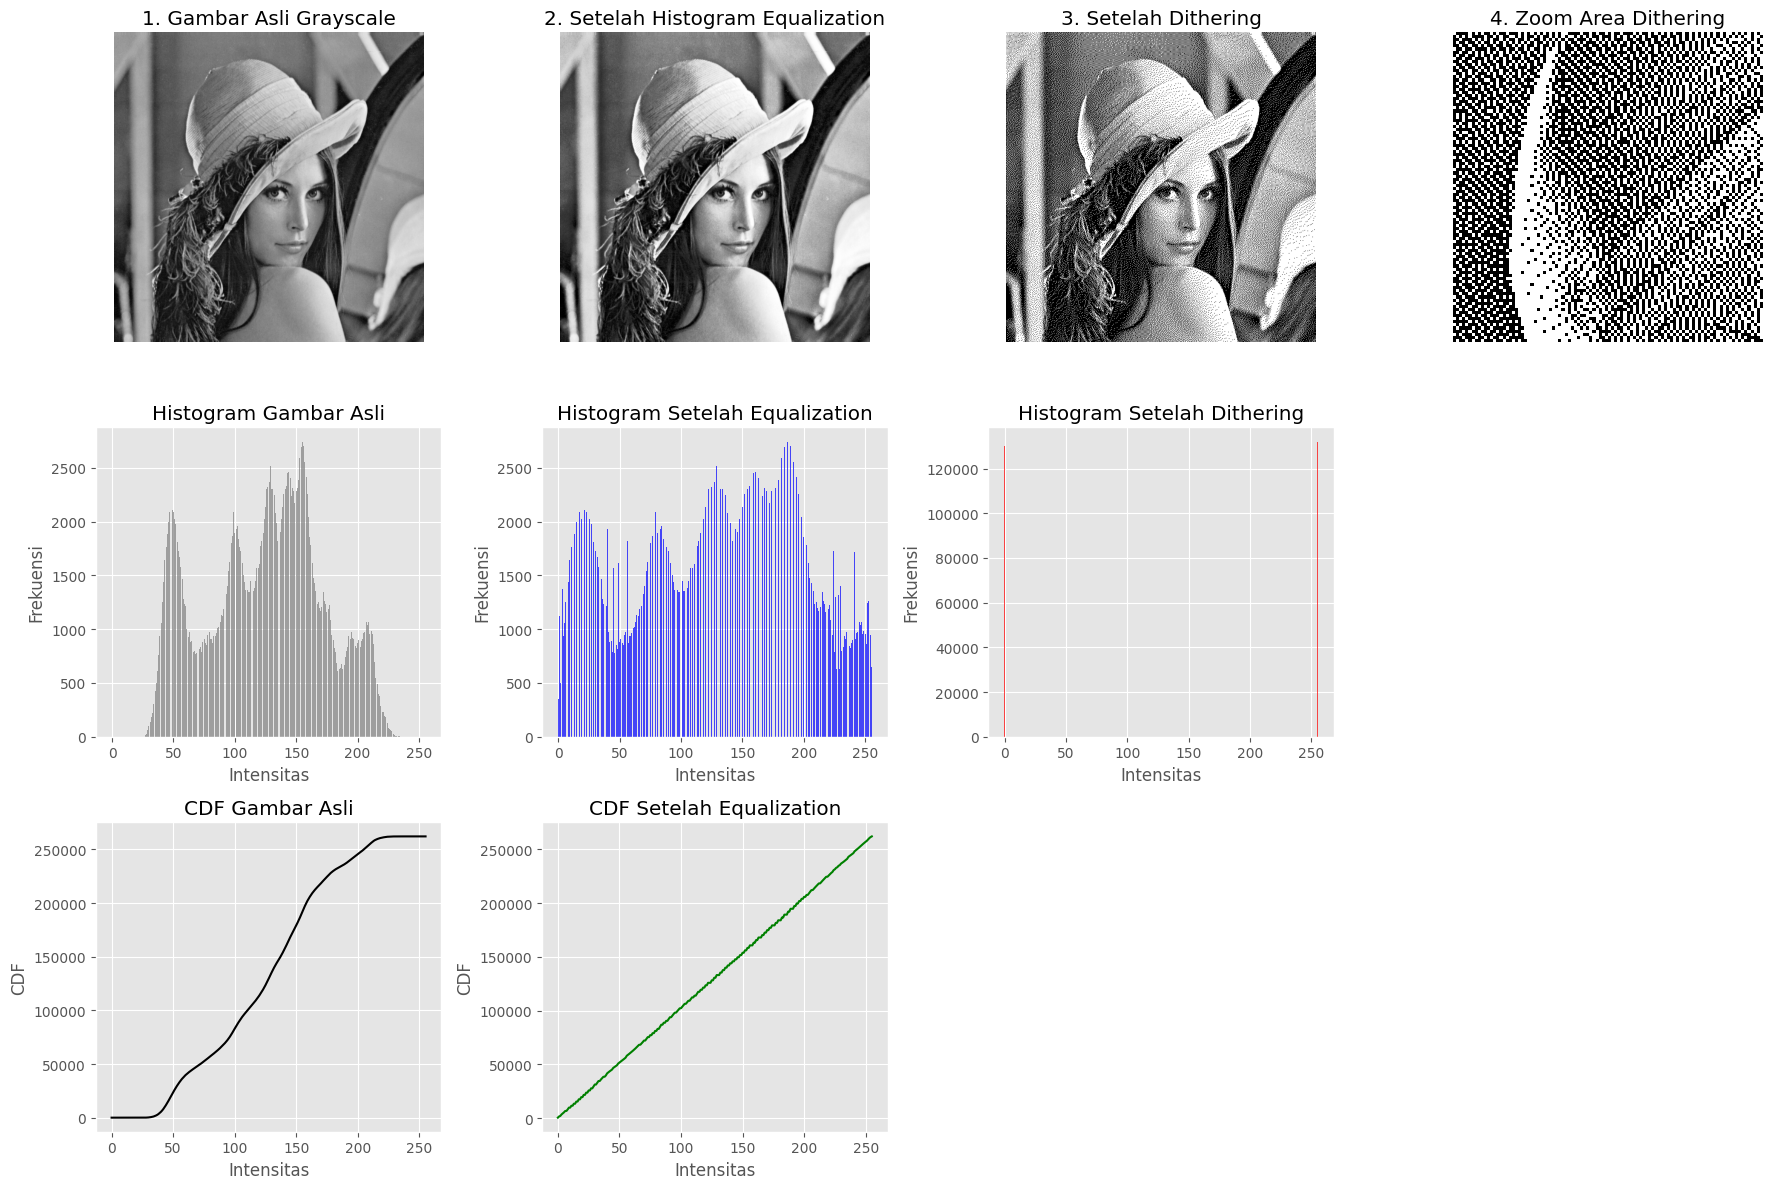

Ringkasan hasil:
1. Histogram Equalization berhasil meningkatkan kontras gambar
2. Dithering berhasil mengurangi kedalaman warna dengan mempertahankan detail
3. Kombinasi kedua teknik menghasilkan gambar dengan kualitas baik dan size lebih kecil


In [10]:
def complete_processing(image_path):
    """Kombinasi histogram equalization dan dithering"""
    # Load image
    img = cv.imread(image_path)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Step 1: Histogram Equalization
    img_equalized = cv.equalizeHist(img_gray)

    # Step 2: Floyd-Steinberg Dithering
    img_final = floyd_steinberg_dithering(img_equalized)

    return img_gray, img_equalized, img_final

# Apply complete processing
original, equalized, dithered = complete_processing(lena_lc_path)

# Plot hasil lengkap
plt.figure(figsize=(18, 12))

# Baris 1: Gambar
plt.subplot(3, 4, 1)
plt.imshow(original, cmap='gray')
plt.title('1. Gambar Asli Grayscale')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(equalized, cmap='gray')
plt.title('2. Setelah Histogram Equalization')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(dithered, cmap='gray')
plt.title('3. Setelah Dithering')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(dithered[100:200, 100:200], cmap='gray')
plt.title('4. Zoom Area Dithering')
plt.axis('off')

# Baris 2: Histogram
hist_orig = np.histogram(original, bins=256, range=[0,256])[0]
hist_eq = np.histogram(equalized, bins=256, range=[0,256])[0]
hist_dith = np.histogram(dithered, bins=256, range=[0,256])[0]

plt.subplot(3, 4, 5)
plt.bar(range(256), hist_orig, color='gray', alpha=0.7)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(3, 4, 6)
plt.bar(range(256), hist_eq, color='blue', alpha=0.7)
plt.title('Histogram Setelah Equalization')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

plt.subplot(3, 4, 7)
plt.bar(range(256), hist_dith, color='red', alpha=0.7)
plt.title('Histogram Setelah Dithering')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')

# Baris 3: CDF
cdf_orig = np.cumsum(hist_orig)
cdf_eq = np.cumsum(hist_eq)

plt.subplot(3, 4, 9)
plt.plot(cdf_orig, color='black')
plt.title('CDF Gambar Asli')
plt.xlabel('Intensitas')
plt.ylabel('CDF')

plt.subplot(3, 4, 10)
plt.plot(cdf_eq, color='green')
plt.title('CDF Setelah Equalization')
plt.xlabel('Intensitas')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()

print("Ringkasan hasil:")
print("1. Histogram Equalization berhasil meningkatkan kontras gambar")
print("2. Dithering berhasil mengurangi kedalaman warna dengan mempertahankan detail")
print("3. Kombinasi kedua teknik menghasilkan gambar dengan kualitas baik dan size lebih kecil")